# Network Analysis Project Overview

Network analysis is a discipline of mathematics that is studied to identify relations among social structures through the use of networks and graph theory. For our project, we are broadly interested in exploring network-linked data to explore clustering methods, that is the aggregation of dense groups in our data, building a clustering algorithm to be tested against current clustering methods in practice, as well as exploring advanced visualization techniques to examine the complex relationships in our data. 

**Goal**: We want to investigate **(1)** the potential clusters that voice actors in anime are in based on the anime they act in, as well as  **(2)** mathematically identify the clusters that certain anime shows are in based on its voice actors.

**Motivation**: We're both interested in parts of Japanese culture, with anime being the primary one in particular.

## Basic Example:

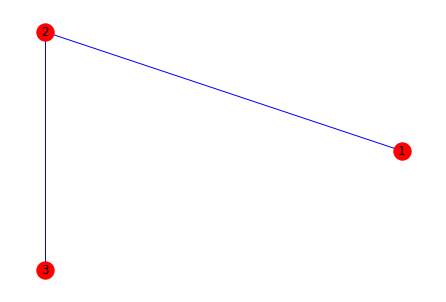

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge(1, 2)  # default edge data=1
G.add_edge(2, 3, weight=0.9)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b', with_labels = True)

# §1. Load Dependencies

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# §2. Comparing Spiders

> **Error from IMDB Scraper in Blog Post 2: Includes both American and Japanese voice actors**

Temporary Solution: Introduce new condition to check if an actor was born in Japan.


## 2a. All Voice Actors

In [76]:
def parse_actor_page_all(self, response):
    
        # Iterate through all of the projects
        for project in response.css("div.filmo-category-section")[0].css("b a::text"):
            actor_name = response.css("span.itemprop::text").get() # Get actor name
            movie_or_TV_name = project.get() # Get project title

        # Yield results in a dictionary
            yield {
                "actor" : actor_name,
                "movie_or_TV_name" : movie_or_TV_name
            }

In [3]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Maile Flanagan,My Babysitter the Super Hero
1,Maile Flanagan,Work Wife
2,Maile Flanagan,The Loud House
3,Maile Flanagan,Barbie & Kendra Save the Tiger King
4,Maile Flanagan,Boruto: Naruto Next Generations


In [6]:
df.shape

(63145, 2)

In [7]:
# Number of unique voice actors
len(df.actor.unique())

511

As we can see this produces a long list of voice actors 

## 2b. Japanese Voice Actors

In [80]:
def parse_actor_page_japan(self, response):
        
        # If voice actor is from Japan procced
        if response.css("div#name-born-info.txt-block").css("a::text")[2].get().split(", ")[1] == "Japan":
            # Iterate through all of the projects
            for project in response.css("div.filmo-category-section")[0].css("b a::text"):
                actor_name = response.css("span.itemprop::text").get() # Get actor name
                movie_or_TV_name = project.get() # Get project title

            # Yield results in a dictionary
                yield {
                    "actor" : actor_name,
                    "movie_or_TV_name" : movie_or_TV_name
                }
        else:
            pass

In [8]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/new_results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Kazuhiko Inoue,Granblue Fantasy: Relink
1,Kazuhiko Inoue,Tsukimichi: Moonlit Fantasy
2,Kazuhiko Inoue,Boruto: Naruto Next Generations
3,Kazuhiko Inoue,Bravely Default II
4,Kazuhiko Inoue,Attack on Titan


In [9]:
df.shape

(23055, 2)

In [10]:
# Number of unique voice actors
len(df.actor.unique())

186

This new parser significantly cuts down the number of voice actors as well as rows of data

# §3. Building a Graph from Data

In [63]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/new_results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Kazuhiko Inoue,Granblue Fantasy: Relink
1,Kazuhiko Inoue,Tsukimichi: Moonlit Fantasy
2,Kazuhiko Inoue,Boruto: Naruto Next Generations
3,Kazuhiko Inoue,Bravely Default II
4,Kazuhiko Inoue,Attack on Titan


In [37]:
df.iloc[0:200]

,actor,movie_or_TV_name
0,Kazuhiko Inoue,Granblue Fantasy: Relink
1,Kazuhiko Inoue,Tsukimichi: Moonlit Fantasy
2,Kazuhiko Inoue,Boruto: Naruto Next Generations
3,Kazuhiko Inoue,Bravely Default II
4,Kazuhiko Inoue,Attack on Titan
...,...,...
195,Chie Nakamura,Naruto Shippûden: Ultimate Ninja Storm 4
196,Chie Nakamura,Mario & Sonic at the Rio 2016 Olympic Games
197,Chie Nakamura,Tokyo Ghoul: Pinto
198,Chie Nakamura,Boruto: Naruto The Movie


In [38]:
df.shape

(23055, 2)

In [57]:
# Let's visualize 100 random relations
DG = nx.from_pandas_edgelist(df, 
                             source = "actor", 
                             target = "movie_or_TV_name", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

In [58]:
colors = []
for node in DG:
    if node in df["actor"].values:
        colors.append("lightblue") # Actor
    else: colors.append("red") # Project Title

In [59]:
#subset a graph

out_degrees = DG.out_degree()
out_degrees

OutDegreeView({'Kazuhiko Inoue': 324, 'Granblue Fantasy: Relink': 0, 'Tsukimichi: Moonlit Fantasy': 0, 'Boruto: Naruto Next Generations': 0, 'Bravely Default II': 0, 'Attack on Titan': 0, 'Natsume Yuujinchou: Ishi Okoshi to Ayashiki Raihousha': 0, 'Tales of the Rays: Last Cradle': 0, 'Love Me, Love Me Not': 0, 'Keep Your Hands Off Eizouken!': 0, 'Nioh 2': 0, 'Smile at the Runway': 0, 'Mob Psycho 100': 0, 'Osomatsusan the Movie': 0, 'Final Fantasy XV: Episode Ardyn - Prologue': 0, 'Jump Force': 0, 'Goblin Slayer': 0, 'Persona Q2: New Cinema Labyrinth': 0, 'Naruto to Boruto: Shinobi Striker': 0, 'Star Blazers 2202': 0, 'Detective Conan: Zero the Enforcer': 0, 'Kakuriyo: Bed & Breakfast for Spirits': 0, 'Tales of the Rays: Mirrage Prison': 0, 'Onmyoji': 0, 'Gintama ranbu': 0, 'Uncharted: The Lost Legacy': 0, 'Restaurant to Another World': 0, 'Fire Emblem Echoes: Shadows of Valentia': 0, 'Final Fantasy XV: Episode Gladiolus': 0, 'Gintama': 0, 'Naruto: Shippûden': 0, 'ACCA: 13-Territory Ins

In [60]:
sub = DG.subgraph([name for name, val in out_degrees if val > 0])add_edge

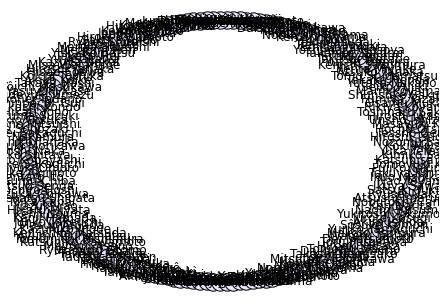

In [61]:
layout = nx.circular_layout(sub)
nx.draw(sub, layout, 
        with_labels = True, 
        edge_color = "gray", 
        node_color = "lavender",
        edgecolors = "black")

In [64]:
url = "https://philchodrow.github.io/PIC16A/homework/HW3-hamilton-data.csv"
df2 = pd.read_csv(url, names = ["source", "target"])
df2.head(n = 30)

,source,target
0,burr,hamilton
1,burr,weeks
2,burr,madison
3,burr,jay
4,burr,theodosiaDaughter
5,burr,betsy
6,burr,theodosiaMother
7,burr,hamilton
8,burr,hamilton
9,burr,hamilton


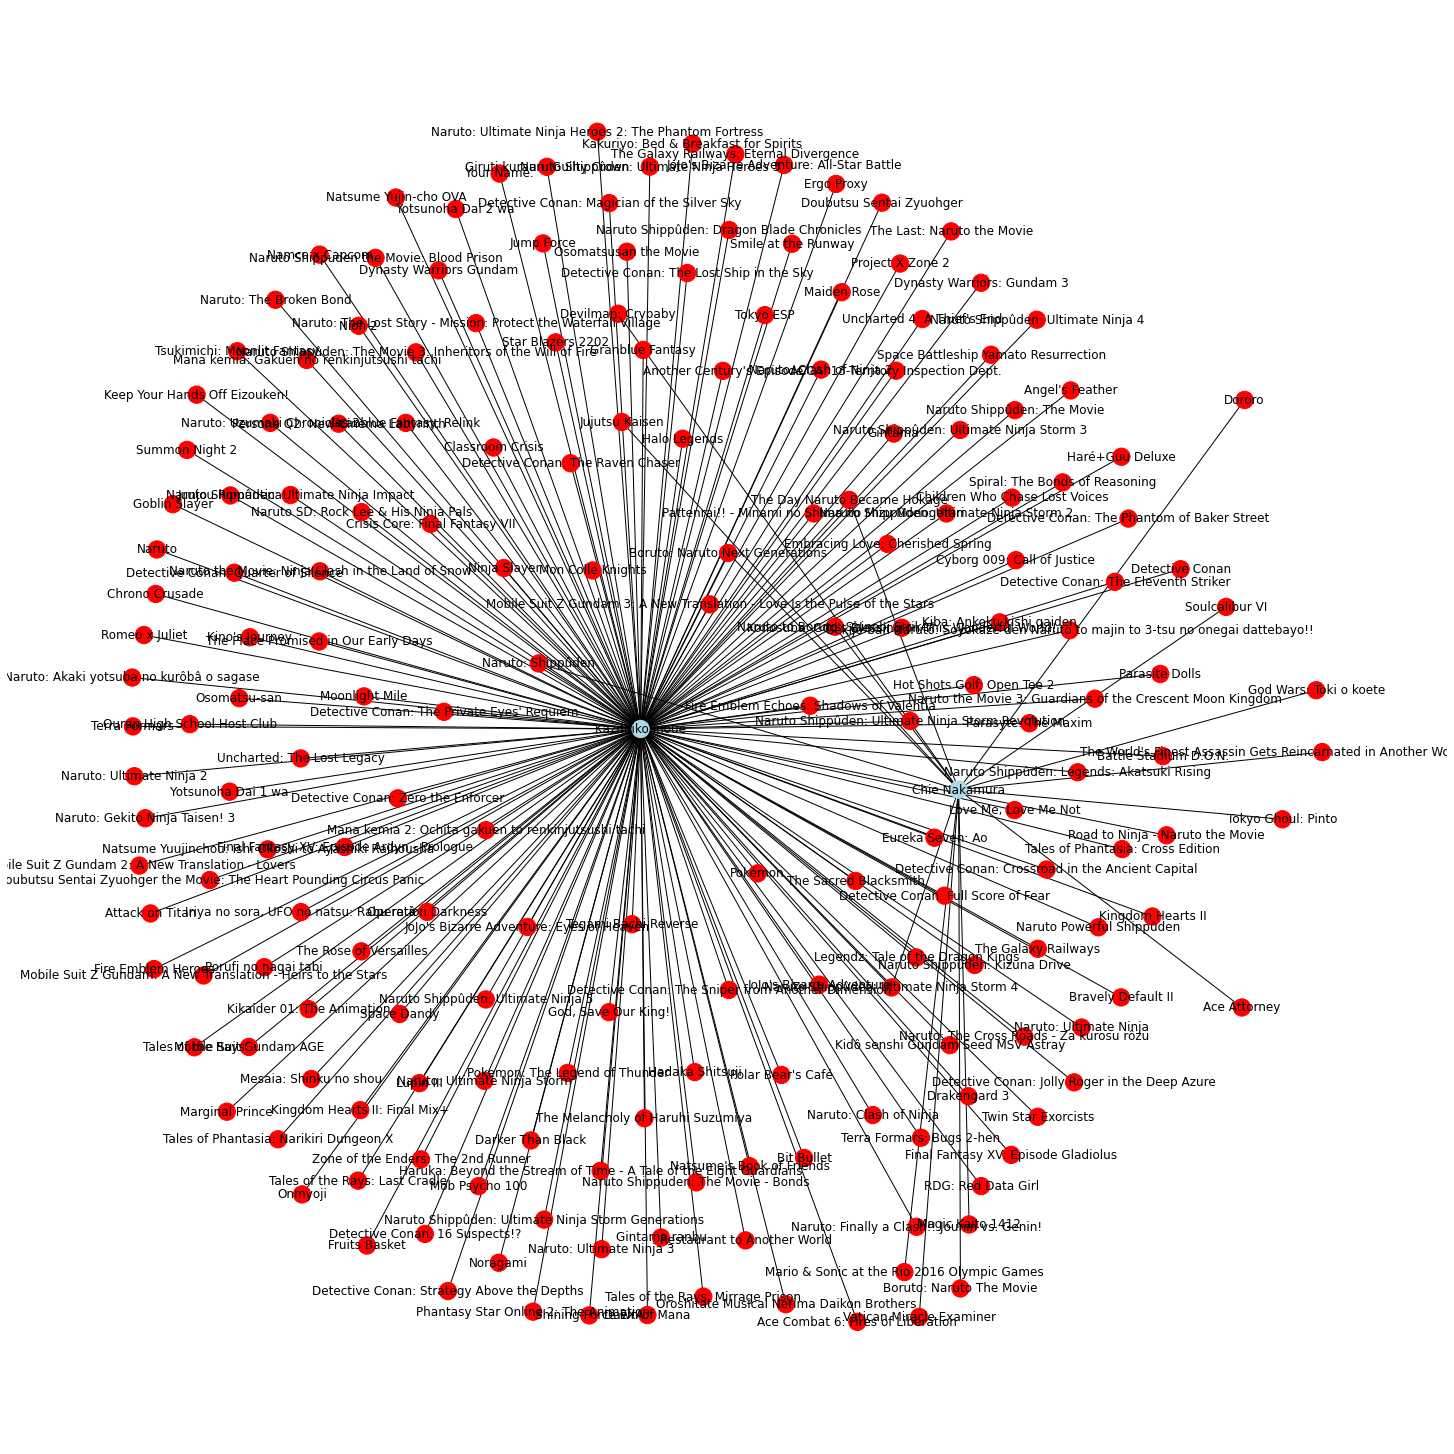

In [34]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(DG, k=0.50)
nx.draw(DG, pos, with_labels = True, node_color=colors)

# §4. Exploratory Analysis

## 4a. Centrality
### Node-Centrality

For our first visualization, we based our degree centrality by the total number of edges a given node has, i.e, 

For a given graph $G = (N, E)$ with a total $|N|$ nodes and $|E|$ edges, define a function $\mathcal{C}_D(n)$ as:

$$\mathcal{C}_D(n) = deg(n) \forall n \in N$$


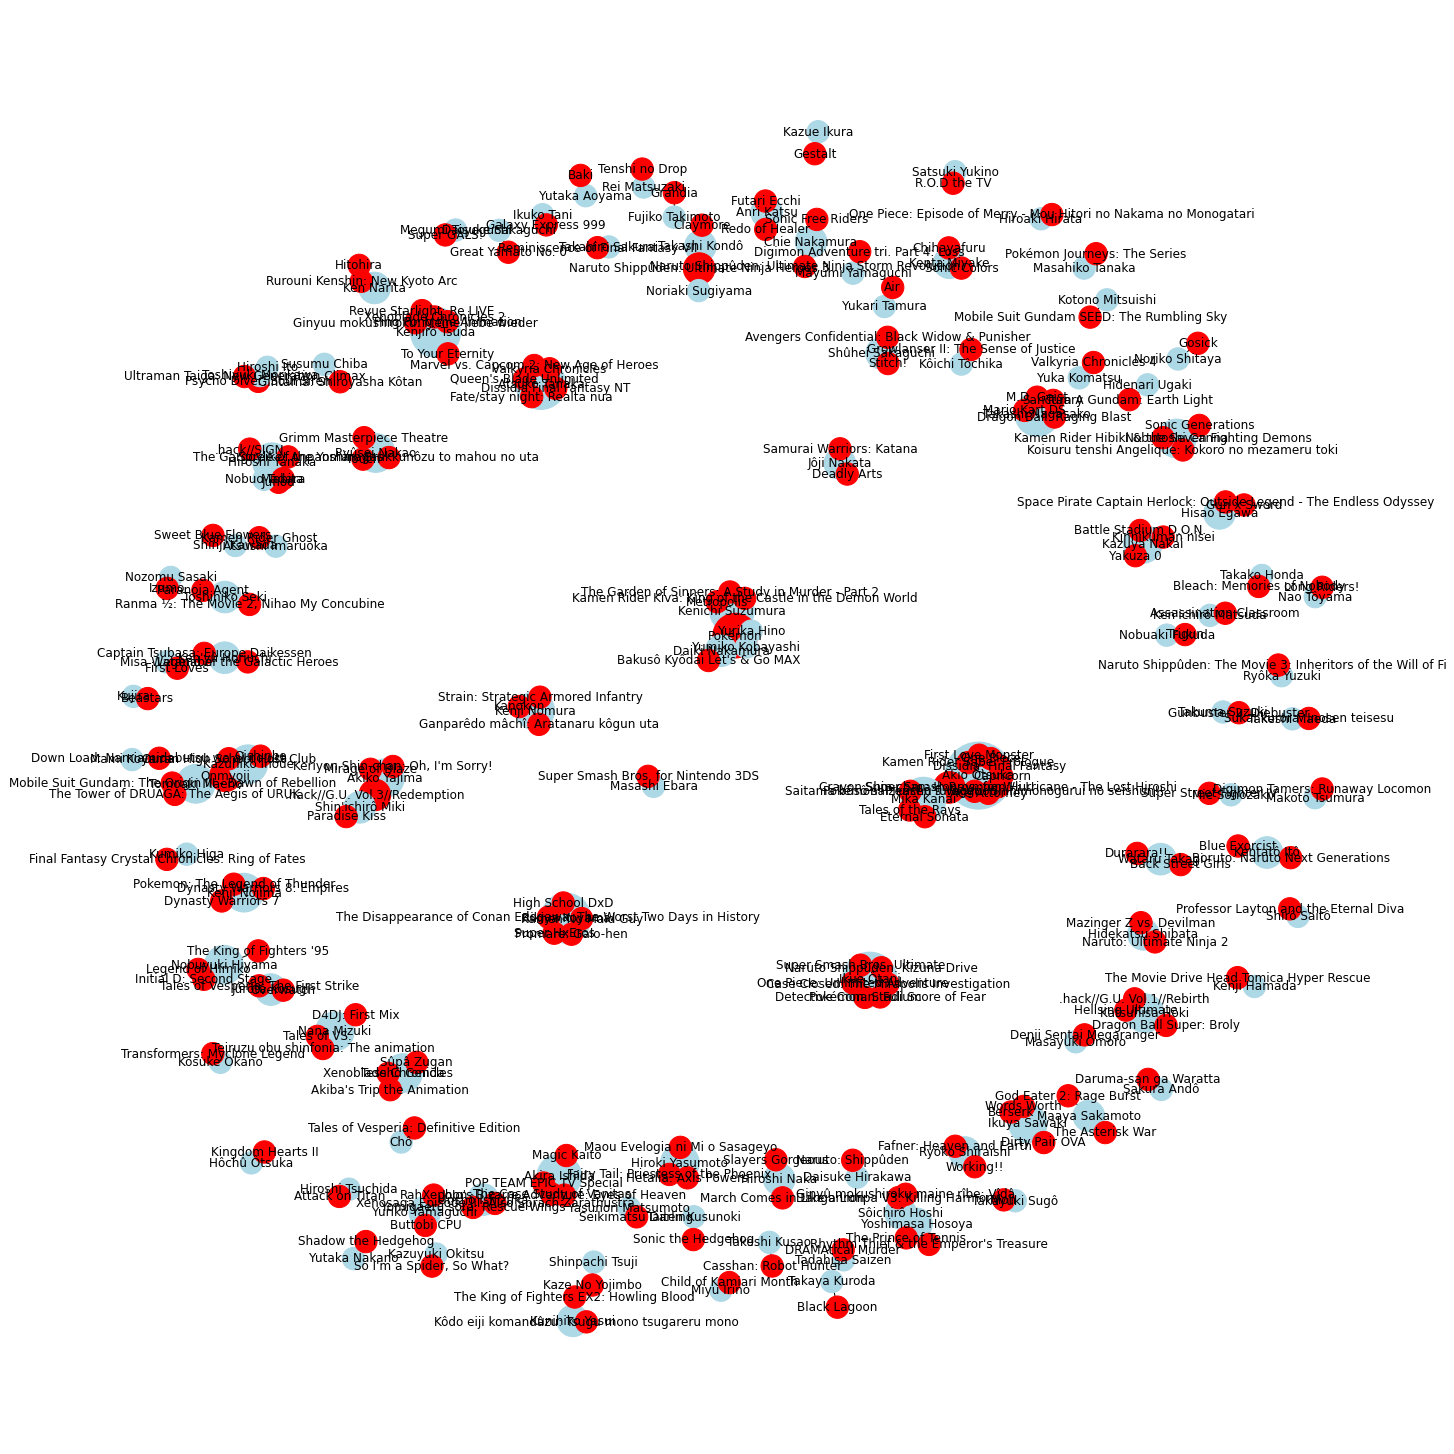

In [51]:
# Visualizing Centrality
deg = DG.degree()
plt.figure(figsize=(20, 20))
layout = nx.layout.fruchterman_reingold_layout(DG)
nx.draw(DG, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [500*deg[i] for i in DG.nodes()])